# U.S. Medical Insurance Costs Linear Regression

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [118]:
med_insurance_2 = pd.read_csv('med_insurance_processed.csv')

med_insurance_2['smoker'] = med_insurance_2.smoker.apply(lambda smoker: 1 if smoker == 'yes' else 0)
med_insurance_2['sex'] = med_insurance_2.sex.apply(lambda sex: 1 if sex == 'male' else 0)

print(med_insurance_2.head(5))

   age  sex     bmi  children  smoker      charges  \
0   19    0  27.900         0       1  16884.92400   
1   18    1  33.770         1       0   1725.55230   
2   28    1  33.000         3       0   4449.46200   
3   33    1  22.705         0       0  21984.47061   
4   32    1  28.880         0       0   3866.85520   

   weight_category_Normal weight  weight_category_Obesity  \
0                              0                        0   
1                              0                        1   
2                              0                        1   
3                              1                        0   
4                              0                        0   

   weight_category_Overweight  weight_category_Underweight  region_northeast  \
0                           1                            0                 0   
1                           0                            0                 0   
2                           0                            0          

In [119]:
x = med_insurance_2[[
 'age', 
 'sex', 
 'children', 
 'smoker', 
 # 'weight_category_Normal weight', 
 'weight_category_Obesity', 
 'weight_category_Overweight',
 # 'weight_category_Underweight',
 'region_northeast',
 'region_northwest',
 'region_southeast',
 # 'region_southwest'
]]

y = med_insurance_2['charges']


x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

mlr = LinearRegression()
mlr.fit(x_train, y_train)

y_predicted = mlr.predict(x_test)

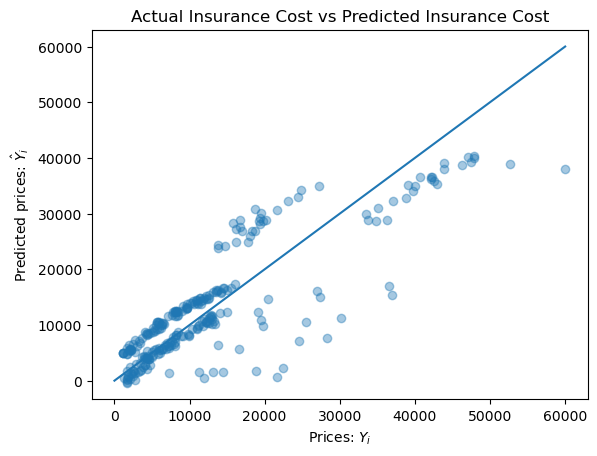

In [126]:
plt.scatter(y_test, y_predicted, alpha=0.4)
plt.plot(range(60000), range(60000))
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Actual Insurance Cost vs Predicted Insurance Cost")
plt.show()

In [121]:
from sklearn.metrics import r2_score, mean_absolute_error

r2 = r2_score(y_test, y_predicted)
mae = mean_absolute_error(y_test, y_predicted)

print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error: ${mae:.2f}")
print(f"Average Actual Charge: ${y_test.mean():.2f}")

R² Score: 0.7258
Mean Absolute Error: $4306.64
Average Actual Charge: $12766.14
